Şevval ÇOBAN
2312721062
https://github.com/SevvalCoban/Endustriyel_boya_karisimi

# Genetik Algoritma ile Endüstriyel Boya Karışımı Optimizasyonu

## Senaryo 2: Endüstriyel Boya Karışımı Optimizasyonu

Bu projede, bir endüstriyel boya üretim fabrikasının iki farklı pigment türünü kullanarak ideal renk yoğunluğunu elde etmesi için optimal karışım oranlarının belirlenmesi problemi ele alınmaktadır. Problem, verilen kısıtlar altında renk kalitesi puanını maksimize edecek şekilde modellenmiş ve Genetik Algoritma yöntemi ile çözülmüştür.

### Problem Tanımı

**Amaç Fonksiyonu:**

$$y = 5x_1 + 2x_2 - x_1x_2$$

Yukarıdaki amaç fonksiyonu, pigment karışımının renk kalitesi puanını ifade etmektedir. Bu fonksiyonun maksimum değerini veren $x_1$ ve $x_2$ değerlerinin bulunması hedeflenmektedir.

**Karar Değişkenleri:**
- $x_1$: Pigment A'nın karışımdaki oranı (%) → [0, 100]
- $x_2$: Pigment B'nin karışımdaki oranı (%) → [0, 100]

**Kısıtlar:**
1. **Toplam Kısıtı**: $x_1 + x_2 = 100$ 
   - Karışımın toplam oranı tam olarak %100 olmalıdır.
   
2. **Minimum Kullanım Kısıtı**: $x_1 \geq 30$
   - Pigment A'nın karışımdaki oranı en az %30 olmalıdır.

### Çözüm Yaklaşımı

Bu optimizasyon problemi, kısıtlı optimizasyon problemi kategorisinde yer almaktadır. Problemin çözümü için **Genetik Algoritma (Genetic Algorithm - GA)** yöntemi kullanılmıştır. Genetik algoritma, doğal evrim sürecini taklit eden meta-sezgisel bir optimizasyon yöntemidir ve popülasyon tabanlı bir arama stratejisi kullanarak global optimum çözüme yakınsamayı hedefler.


In [1]:
# Gerekli kütüphanelerin import edilmesi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Rastgele sayı üretimi için seed belirleme (sonuçların tekrarlanabilir olması için)
np.random.seed(42)
random.seed(42)

print("Kütüphaneler başarıyla yüklendi!")


Kütüphaneler başarıyla yüklendi!


## 1. Problemin Tanımı ve Modelleme

Bu bölümde, optimizasyon probleminin matematiksel modeli oluşturulmakta ve gerekli fonksiyonlar tanımlanmaktadır.

### 1.1 Amaç Fonksiyonu

Amaç fonksiyonu, verilen pigment oranları için renk kalitesi puanını hesaplayan matematiksel bir ifadedir. Bu fonksiyon, iki değişkenin doğrusal ve çarpımsal kombinasyonunu içermektedir. Optimizasyonun amacı, bu fonksiyonun değerini maksimize etmektir.


In [2]:
def amac_fonksiyonu(x1, x2):
    """
    Amaç fonksiyonu: y = 5x₁ + 2x₂ - x₁x₂
    
    Parametreler:
    x1: Pigment A oranı (%)
    x2: Pigment B oranı (%)
    
    Döndürür:
    Renk kalitesi puanı
    """
    return 5 * x1 + 2 * x2 - x1 * x2

# Test: Örnek bir değer için amaç fonksiyonunu hesaplayalım
test_x1, test_x2 = 50, 50
test_sonuc = amac_fonksiyonu(test_x1, test_x2)
print(f"Test: x₁={test_x1}, x₂={test_x2} için amaç fonksiyonu değeri: {test_sonuc}")


Test: x₁=50, x₂=50 için amaç fonksiyonu değeri: -2150


### 1.2 Kısıt Kontrol Fonksiyonları

Optimizasyon sürecinde, üretilen her çözüm adayının (birey) problem kısıtlarını sağlayıp sağlamadığının kontrol edilmesi gerekmektedir. Bu amaçla, aşağıdaki kısıtları kontrol eden bir fonksiyon tanımlanmıştır:

1. **Toplam Kısıtı**: $x_1 + x_2 = 100$ 
   - Karışım oranlarının toplamı tam olarak 100 olmalıdır. Sayısal hesaplamalarda küçük hatalar olabileceğinden, belirli bir tolerans değeri kabul edilmektedir.

2. **Minimum Kullanım Kısıtı**: $x_1 \geq 30$
   - Pigment A'nın minimum kullanım oranı kısıtı kontrol edilmektedir.


In [3]:
def kisit_kontrol(x1, x2, tolerans=0.01):
    """
    Kısıtların sağlanıp sağlanmadığını kontrol eder.
    
    Kısıtlar:
    1. x₁ + x₂ = 100 (tolerans dahilinde)
    2. x₁ ≥ 30
    
    Parametreler:
    x1: Pigment A oranı
    x2: Pigment B oranı
    tolerans: Toplam kısıtı için kabul edilebilir hata payı
    
    Döndürür:
    True eğer tüm kısıtlar sağlanıyorsa, False aksi halde
    """
    # Kısıt 1: Toplam %100 olmalı
    toplam_kisit = abs(x1 + x2 - 100) <= tolerans
    
    # Kısıt 2: x₁ en az 30 olmalı
    minimum_kisit = x1 >= 30
    
    return toplam_kisit and minimum_kisit

# Test: Kısıt kontrolünü test edelim
print("Kısıt Kontrol Testleri:")
print(f"x₁=50, x₂=50: {kisit_kontrol(50, 50)}")  # True olmalı
print(f"x₁=30, x₂=70: {kisit_kontrol(30, 70)}")  # True olmalı
print(f"x₁=20, x₂=80: {kisit_kontrol(20, 80)}")  # False olmalı (x₁ < 30)
print(f"x₁=40, x₂=50: {kisit_kontrol(40, 50)}")  # False olmalı (toplam ≠ 100)


Kısıt Kontrol Testleri:
x₁=50, x₂=50: True
x₁=30, x₂=70: True
x₁=20, x₂=80: False
x₁=40, x₂=50: False


## 2. Genetik Algoritma Yapısı

Genetik algoritmanın temel bileşenleri bu bölümde detaylı olarak açıklanmaktadır. Algoritmanın başarılı çalışması için her bileşenin doğru şekilde tasarlanması ve uygulanması kritik öneme sahiptir.

### 2.1 Birey ve Popülasyon Tanımı

Genetik algoritmada, her **birey** problemin bir çözüm adayını temsil eder. Bu projede, bir birey iki değişkeni içermektedir: $x_1$ (Pigment A oranı) ve $x_2$ (Pigment B oranı). 

Ancak, $x_1 + x_2 = 100$ kısıtı nedeniyle, $x_1$ değeri belirlendiğinde $x_2$ değeri otomatik olarak $x_2 = 100 - x_1$ şeklinde hesaplanabilmektedir. Bu durum, problemin boyutunu azaltmakta ve çözüm sürecini hızlandırmaktadır.

**Popülasyon** ise, aynı anda değerlendirilen bireylerin toplamıdır. Popülasyon boyutu, algoritmanın arama yeteneğini ve yakınsama hızını etkileyen önemli bir parametredir.


In [4]:
def birey_olustur():
    """
    Kısıtları sağlayan rastgele bir birey oluşturur.
    
    x₁ [30, 100] aralığında seçilir (çünkü x₁ ≥ 30 ve x₁ + x₂ = 100)
    x₂ = 100 - x₁ olarak hesaplanır
    
    Döndürür:
    [x1, x2] formatında bir birey
    """
    # x₁ en az 30, en fazla 100 olabilir (çünkü x₂ ≥ 0 olmalı)
    x1 = np.random.uniform(30, 100)
    x2 = 100 - x1
    return [x1, x2]

def populasyon_olustur(populasyon_boyutu=50):
    """
    Belirtilen boyutta rastgele bir popülasyon oluşturur.
    
    Parametreler:
    populasyon_boyutu: Popülasyondaki birey sayısı
    
    Döndürür:
    Popülasyon matrisi (her satır bir birey)
    """
    populasyon = []
    for _ in range(populasyon_boyutu):
        birey = birey_olustur()
        populasyon.append(birey)
    return np.array(populasyon)

# Test: Popülasyon oluşturma
test_populasyon = populasyon_olustur(10)
print("Örnek Popülasyon (ilk 5 birey):")
print(test_populasyon[:5])
print(f"\nPopülasyon boyutu: {len(test_populasyon)}")
print(f"Her birey kısıtları sağlıyor mu? {all(kisit_kontrol(b[0], b[1]) for b in test_populasyon)}")


Örnek Popülasyon (ilk 5 birey):
[[56.21780832 43.78219168]
 [96.55000145  3.44999855]
 [81.23957593 18.76042407]
 [71.90609389 28.09390611]
 [40.92130483 59.07869517]]

Popülasyon boyutu: 10
Her birey kısıtları sağlıyor mu? True


### 2.2 Uygunluk (Fitness) Fonksiyonu

**Uygunluk fonksiyonu** (fitness function), genetik algoritmanın en önemli bileşenlerinden biridir. Bu fonksiyon, her bireyin problemin çözümüne ne kadar uygun olduğunu sayısal olarak ifade eder. 

Bu projede, amaç fonksiyonunu maksimize etmek istediğimiz için, fitness değeri doğrudan amaç fonksiyonunun değeri olarak alınmıştır. Ancak, kısıtları ihlal eden bireyler için ceza mekanizması uygulanarak, bu bireylerin seçilme olasılığı minimize edilmiştir.


In [5]:
def fitness_hesapla(birey):
    """
    Bir bireyin uygunluk (fitness) değerini hesaplar.
    
    Parametreler:
    birey: [x1, x2] formatında bir birey
    
    Döndürür:
    Fitness değeri (amaç fonksiyonu değeri)
    """
    x1, x2 = birey[0], birey[1]
    
    # Kısıtları sağlamıyorsa çok düşük fitness ver
    if not kisit_kontrol(x1, x2):
        return -10000  # Ceza değeri
    
    return amac_fonksiyonu(x1, x2)

def populasyon_fitness_hesapla(populasyon):
    """
    Tüm popülasyonun fitness değerlerini hesaplar.
    
    Parametreler:
    populasyon: Popülasyon matrisi
    
    Döndürür:
    Fitness değerleri dizisi
    """
    return np.array([fitness_hesapla(birey) for birey in populasyon])

# Test: Fitness hesaplama
test_birey = [50, 50]
test_fitness = fitness_hesapla(test_birey)
print(f"Test birey [50, 50] için fitness: {test_fitness}")
print(f"Amaç fonksiyonu değeri: {amac_fonksiyonu(50, 50)}")


Test birey [50, 50] için fitness: -2150
Amaç fonksiyonu değeri: -2150


### 2.3 Seçilim Mekanizması (Turnuva Seçilimi)

**Seçilim mekanizması**, bir sonraki nesle aktarılacak bireylerin belirlenmesinde kullanılan yöntemdir. Bu projede **Turnuva Seçilimi (Tournament Selection)** yöntemi kullanılmıştır.

Turnuva seçilimi şu şekilde çalışır:
1. Popülasyondan rastgele belirli sayıda (turnuva boyutu) birey seçilir.
2. Seçilen bireyler arasından en yüksek fitness değerine sahip olan kazanan olarak belirlenir.
3. Bu işlem, yeni popülasyon oluşturulana kadar tekrarlanır.

Bu yöntemin avantajları:
- Uygulanması basittir ve hesaplama maliyeti düşüktür.
- Genetik çeşitliliği korumaya yardımcı olur.
- Seçilim basıncını turnuva boyutu ile ayarlamak mümkündür.


In [6]:
def turnuva_secimi(populasyon, fitness_degerleri, turnuva_boyutu=3):
    """
    Turnuva seçilimi ile bir birey seçer.
    
    Parametreler:
    populasyon: Popülasyon matrisi
    fitness_degerleri: Her bireyin fitness değeri
    turnuva_boyutu: Turnuvaya katılacak birey sayısı
    
    Döndürür:
    Seçilen birey
    """
    # Rastgele turnuva_boyutu kadar birey seç
    turnuva_indisleri = np.random.choice(len(populasyon), turnuva_boyutu, replace=False)
    turnuva_fitness = fitness_degerleri[turnuva_indisleri]
    
    # En iyi fitness değerine sahip bireyi seç
    kazanan_indis = turnuva_indisleri[np.argmax(turnuva_fitness)]
    
    return populasyon[kazanan_indis].copy()

# Test: Turnuva seçimi
test_pop = populasyon_olustur(20)
test_fitness = populasyon_fitness_hesapla(test_pop)
secilen = turnuva_secimi(test_pop, test_fitness)
print(f"Seçilen birey: {secilen}")
print(f"Seçilen bireyin fitness değeri: {fitness_hesapla(secilen)}")


Seçilen birey: [72.82970263 27.17029737]
Seçilen bireyin fitness değeri: -1560.3155699082022


### 2.4 Çaprazlama (Crossover)

**Çaprazlama (crossover)** operasyonu, genetik algoritmanın temel operatörlerinden biridir. Bu operasyon, iki ebeveyn bireyden genetik bilgileri birleştirerek yeni bir çocuk birey üretir. Çaprazlama, iyi özelliklere sahip bireylerin genetik bilgilerini birleştirerek daha iyi çözümler üretmeyi hedefler.

Bu projede, **ağırlıklı ortalama (weighted average)** yöntemi kullanılmıştır:
- İki ebeveynin $x_1$ değerleri, rastgele bir ağırlık ($\alpha$) kullanılarak birleştirilir.
- Yeni $x_1$ değeri: $x_1^{yeni} = \alpha \cdot x_1^{ebeveyn1} + (1-\alpha) \cdot x_1^{ebeveyn2}$ şeklinde hesaplanır.
- $x_2$ değeri, kısıt gereği $x_2 = 100 - x_1$ olarak otomatik hesaplanır.
- Üretilen çocuk birey, kısıtları sağlayacak şekilde düzeltilir.

Çaprazlama oranı, bu operasyonun ne sıklıkla uygulanacağını belirler ve genellikle 0.7-0.9 aralığında seçilir.


In [7]:
def crossover(ebeveyn1, ebeveyn2, crossover_orani=0.8):
    """
    İki ebeveynden yeni bir çocuk birey oluşturur.
    
    Parametreler:
    ebeveyn1: İlk ebeveyn birey
    ebeveyn2: İkinci ebeveyn birey
    crossover_orani: Çaprazlama yapılma olasılığı
    
    Döndürür:
    Yeni çocuk birey
    """
    # Rastgele sayı üret, crossover_orani'den küçükse çaprazlama yap
    if np.random.random() < crossover_orani:
        # Ağırlıklı ortalama ile yeni x₁ değeri oluştur
        alpha = np.random.random()  # 0-1 arası rastgele ağırlık
        yeni_x1 = alpha * ebeveyn1[0] + (1 - alpha) * ebeveyn2[0]
        
        # Kısıtları sağlamak için düzeltme
        yeni_x1 = np.clip(yeni_x1, 30, 100)  # x₁ [30, 100] aralığında olmalı
        yeni_x2 = 100 - yeni_x1
        
        return np.array([yeni_x1, yeni_x2])
    else:
        # Çaprazlama yapılmazsa, ebeveynlerden birini döndür
        return ebeveyn1.copy() if np.random.random() < 0.5 else ebeveyn2.copy()

# Test: Crossover
ebeveyn1 = np.array([40, 60])
ebeveyn2 = np.array([60, 40])
cocuk = crossover(ebeveyn1, ebeveyn2)
print(f"Ebeveyn 1: {ebeveyn1}")
print(f"Ebeveyn 2: {ebeveyn2}")
print(f"Çocuk: {cocuk}")
print(f"Çocuk kısıtları sağlıyor mu? {kisit_kontrol(cocuk[0], cocuk[1])}")


Ebeveyn 1: [40 60]
Ebeveyn 2: [60 40]
Çocuk: [41.81359196 58.18640804]
Çocuk kısıtları sağlıyor mu? True


### 2.5 Mutasyon

**Mutasyon (mutation)** operasyonu, genetik algoritmanın lokal optimumlardan kaçınmasına ve çözüm uzayını daha iyi keşfetmesine yardımcı olan önemli bir mekanizmadır. Mutasyon, bireylerde küçük rastgele değişiklikler yaparak genetik çeşitliliği artırır.

Bu projede uygulanan mutasyon stratejisi:
- Her birey için, mutasyon oranına göre rastgele olarak mutasyon uygulanıp uygulanmayacağına karar verilir.
- Mutasyon uygulanacaksa, $x_1$ değerine rastgele bir değişiklik eklenir.
- Değişiklik miktarı, mutasyon kapsamı (mutation range) parametresi ile kontrol edilir.
- Mutasyon sonrası, bireyin kısıtları sağlaması için gerekli düzeltmeler yapılır.

Mutasyon oranı genellikle düşük tutulur (0.01-0.1 aralığında) çünkü çok yüksek mutasyon oranları, algoritmanın rastgele arama yapmasına neden olabilir.
"

In [8]:
def mutasyon(birey, mutasyon_orani=0.1, mutasyon_kapsami=5.0):
    """
    Bir bireye mutasyon uygular.
    
    Parametreler:
    birey: Mutasyona uğrayacak birey
    mutasyon_orani: Mutasyon yapılma olasılığı
    mutasyon_kapsami: Mutasyon miktarı (ne kadar değişiklik yapılacağı)
    
    Döndürür:
    Mutasyona uğramış birey
    """
    mutasyonlu_birey = birey.copy()
    
    # Mutasyon olasılığına göre mutasyon yap
    if np.random.random() < mutasyon_orani:
        # x₁ değerine rastgele bir değişiklik ekle
        degisim = np.random.uniform(-mutasyon_kapsami, mutasyon_kapsami)
        yeni_x1 = mutasyonlu_birey[0] + degisim
        
        # Kısıtları sağlamak için düzeltme
        yeni_x1 = np.clip(yeni_x1, 30, 100)
        yeni_x2 = 100 - yeni_x1
        
        mutasyonlu_birey = np.array([yeni_x1, yeni_x2])
    
    return mutasyonlu_birey

# Test: Mutasyon
test_birey = np.array([50, 50])
mutasyonlu = mutasyon(test_birey)
print(f"Orijinal birey: {test_birey}")
print(f"Mutasyonlu birey: {mutasyonlu}")
print(f"Mutasyonlu birey kısıtları sağlıyor mu? {kisit_kontrol(mutasyonlu[0], mutasyonlu[1])}")


Orijinal birey: [50 50]
Mutasyonlu birey: [50 50]
Mutasyonlu birey kısıtları sağlıyor mu? True


### 2.6 Genetik Algoritma Ana Döngüsü

Bu bölümde, yukarıda tanımlanan tüm bileşenler (popülasyon oluşturma, fitness hesaplama, seçilim, çaprazlama, mutasyon) bir araya getirilerek genetik algoritmanın ana döngüsü oluşturulmaktadır.

**Algoritma Akışı:**
1. **Başlangıç**: Rastgele bir başlangıç popülasyonu oluşturulur.
2. **Değerlendirme**: Her bireyin fitness değeri hesaplanır.
3. **Yeni Nesil Oluşturma**: 
   - **Elitizm**: En iyi bireylerin bir kısmı direkt olarak yeni nesle aktarılır.
   - **Seçilim, Çaprazlama ve Mutasyon**: Kalan bireyler, seçilim, çaprazlama ve mutasyon operatörleri kullanılarak üretilir.
4. **Yakınsama Kontrolü**: Belirlenen nesil sayısına ulaşılana kadar adımlar 2-3 tekrarlanır.
5. **Sonuç**: En iyi birey optimal çözüm olarak döndürülür.

Elitizm mekanizması, her nesilde en iyi çözümlerin kaybolmasını önler ve algoritmanın yakınsama performansını artırır.


In [9]:
def genetik_algoritma(populasyon_boyutu=50, nesil_sayisi=100, 
                     crossover_orani=0.8, mutasyon_orani=0.1,
                     elitizm_orani=0.1):
    """
    Genetik algoritma ile optimizasyon yapar.
    
    Parametreler:
    populasyon_boyutu: Popülasyondaki birey sayısı
    nesil_sayisi: Kaç nesil boyunca algoritma çalışacak
    crossover_orani: Çaprazlama yapılma olasılığı
    mutasyon_orani: Mutasyon yapılma olasılığı
    elitizm_orani: En iyi bireylerin yüzde kaçı bir sonraki nesle aktarılacak
    
    Döndürür:
    en_iyi_birey: Bulunan en iyi çözüm
    en_iyi_fitness: En iyi fitness değeri
    gecmis: Her nesildeki en iyi fitness değerleri
    """
    # İlk popülasyonu oluştur
    populasyon = populasyon_olustur(populasyon_boyutu)
    
    # Geçmiş verileri saklamak için listeler
    gecmis_en_iyi_fitness = []
    gecmis_ortalama_fitness = []
    
    # Her nesil için
    for nesil in range(nesil_sayisi):
        # Fitness değerlerini hesapla
        fitness_degerleri = populasyon_fitness_hesapla(populasyon)
        
        # En iyi ve ortalama fitness değerlerini kaydet
        en_iyi_fitness = np.max(fitness_degerleri)
        ortalama_fitness = np.mean(fitness_degerleri)
        gecmis_en_iyi_fitness.append(en_iyi_fitness)
        gecmis_ortalama_fitness.append(ortalama_fitness)
        
        # En iyi bireyi bul
        en_iyi_indis = np.argmax(fitness_degerleri)
        en_iyi_birey = populasyon[en_iyi_indis].copy()
        
        # Yeni popülasyon oluştur
        yeni_populasyon = []
        
        # Elitizm: En iyi bireylerin bir kısmını direkt aktar
        elitizm_sayisi = int(populasyon_boyutu * elitizm_orani)
        elit_indisler = np.argsort(fitness_degerleri)[-elitizm_sayisi:]
        for i in elit_indisler:
            yeni_populasyon.append(populasyon[i].copy())
        
        # Kalan bireyleri üret
        while len(yeni_populasyon) < populasyon_boyutu:
            # Seçilim
            ebeveyn1 = turnuva_secimi(populasyon, fitness_degerleri)
            ebeveyn2 = turnuva_secimi(populasyon, fitness_degerleri)
            
            # Çaprazlama
            cocuk = crossover(ebeveyn1, ebeveyn2, crossover_orani)
            
            # Mutasyon
            cocuk = mutasyon(cocuk, mutasyon_orani)
            
            yeni_populasyon.append(cocuk)
        
        # Yeni popülasyonu güncelle
        populasyon = np.array(yeni_populasyon)
        
        # İlerleme bilgisi (her 10 nesilde bir)
        if (nesil + 1) % 10 == 0:
            print(f"Nesil {nesil + 1}/{nesil_sayisi}: En iyi fitness = {en_iyi_fitness:.2f}, "
                  f"Ortalama fitness = {ortalama_fitness:.2f}")
    
    # Final fitness hesaplama
    final_fitness = populasyon_fitness_hesapla(populasyon)
    en_iyi_indis = np.argmax(final_fitness)
    en_iyi_birey = populasyon[en_iyi_indis]
    en_iyi_fitness = final_fitness[en_iyi_indis]
    
    return en_iyi_birey, en_iyi_fitness, gecmis_en_iyi_fitness, gecmis_ortalama_fitness

print("Genetik algoritma fonksiyonu tanımlandı!")


Genetik algoritma fonksiyonu tanımlandı!


## 3. Algoritmanın Çalıştırılması

Bu bölümde, tanımlanan genetik algoritma belirlenen parametreler ile çalıştırılmakta ve optimal çözüm aranmaktadır. Algoritma parametreleri, literatürde yaygın olarak kullanılan değerler ve problemin özellikleri göz önünde bulundurularak seçilmiştir.


In [10]:
# Genetik algoritma parametreleri
POPULASYON_BOYUTU = 50
NESIL_SAYISI = 100
CROSSOVER_ORANI = 0.8
MUTASYON_ORANI = 0.1
ELITIZM_ORANI = 0.1

# Algoritmayı çalıştır
print("Genetik algoritma başlatılıyor...\n")
en_iyi_birey, en_iyi_fitness, gecmis_en_iyi, gecmis_ortalama = genetik_algoritma(
    populasyon_boyutu=POPULASYON_BOYUTU,
    nesil_sayisi=NESIL_SAYISI,
    crossover_orani=CROSSOVER_ORANI,
    mutasyon_orani=MUTASYON_ORANI,
    elitizm_orani=ELITIZM_ORANI
)

# Sonuçları yazdır
print("\n" + "="*50)
print("OPTİMİZASYON SONUÇLARI")
print("="*50)
print(f"En iyi çözüm:")
print(f"  x₁ (Pigment A oranı): {en_iyi_birey[0]:.4f}%")
print(f"  x₂ (Pigment B oranı): {en_iyi_birey[1]:.4f}%")
print(f"  Toplam: {en_iyi_birey[0] + en_iyi_birey[1]:.4f}%")
print(f"\nEn iyi fitness değeri (Renk kalitesi puanı): {en_iyi_fitness:.4f}")
print(f"\nKısıt kontrolü:")
print(f"  x₁ + x₂ = 100? {abs(en_iyi_birey[0] + en_iyi_birey[1] - 100) < 0.01}")
print(f"  x₁ ≥ 30? {en_iyi_birey[0] >= 30}")


Genetik algoritma başlatılıyor...

Nesil 10/100: En iyi fitness = 500.00, Ortalama fitness = 490.85
Nesil 20/100: En iyi fitness = 500.00, Ortalama fitness = 492.72
Nesil 30/100: En iyi fitness = 500.00, Ortalama fitness = 486.31
Nesil 40/100: En iyi fitness = 500.00, Ortalama fitness = 475.57
Nesil 50/100: En iyi fitness = 500.00, Ortalama fitness = 484.88
Nesil 60/100: En iyi fitness = 500.00, Ortalama fitness = 482.84
Nesil 70/100: En iyi fitness = 500.00, Ortalama fitness = 495.76
Nesil 80/100: En iyi fitness = 500.00, Ortalama fitness = 500.00
Nesil 90/100: En iyi fitness = 500.00, Ortalama fitness = 500.00
Nesil 100/100: En iyi fitness = 500.00, Ortalama fitness = 491.82

OPTİMİZASYON SONUÇLARI
En iyi çözüm:
  x₁ (Pigment A oranı): 100.0000%
  x₂ (Pigment B oranı): 0.0000%
  Toplam: 100.0000%

En iyi fitness değeri (Renk kalitesi puanı): 500.0000

Kısıt kontrolü:
  x₁ + x₂ = 100? True
  x₁ ≥ 30? True


## 4. Sonuçların Görselleştirilmesi ve Analiz

Bu bölümde, genetik algoritmanın performansı ve bulunan optimal çözüm detaylı olarak analiz edilmekte ve görselleştirilmektedir. Görselleştirmeler, algoritmanın yakınsama davranışını ve çözüm uzayındaki optimal noktayı anlamamıza yardımcı olmaktadır.

### 4.1 Amaç Fonksiyonunun Evrimi

Aşağıdaki grafik, algoritmanın çalışması sırasında en iyi fitness değerinin ve popülasyon ortalamasının nesiller boyunca nasıl değiştiğini göstermektedir. Bu grafik, algoritmanın yakınsama davranışını ve performansını değerlendirmemize olanak sağlar.


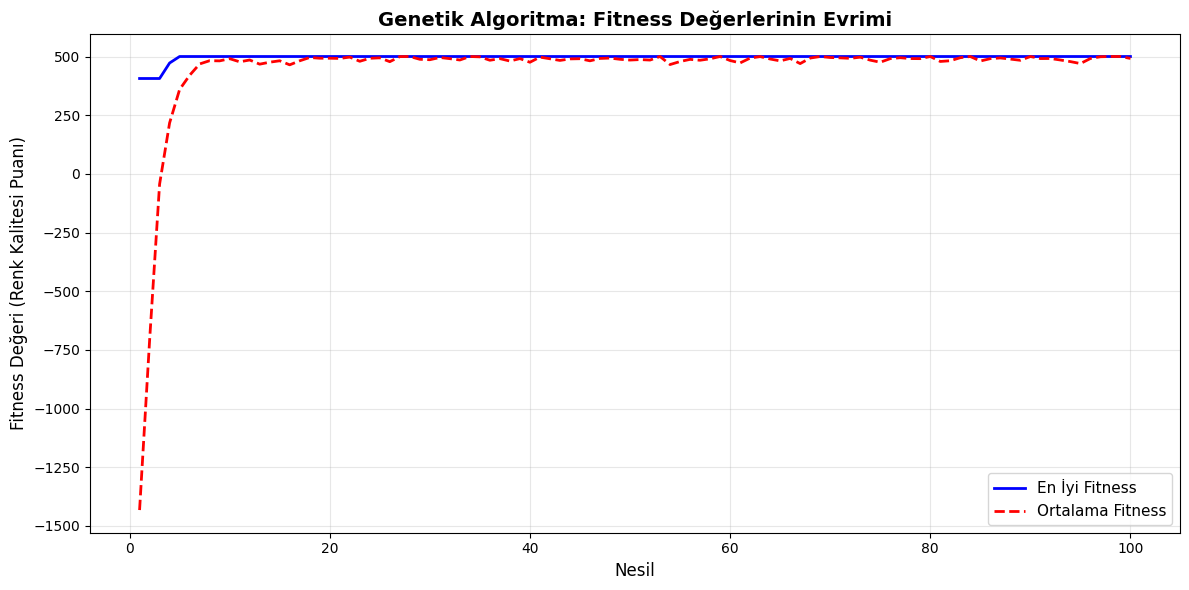

Başlangıç en iyi fitness: 406.2974
Final en iyi fitness: 500.0000
İyileşme: 93.7026


In [16]:
# Fitness evrimi grafiği
plt.figure(figsize=(12, 6))
nesiller = range(1, len(gecmis_en_iyi) + 1)

plt.plot(nesiller, gecmis_en_iyi, label='En İyi Fitness', linewidth=2, color='blue')
plt.plot(nesiller, gecmis_ortalama, label='Ortalama Fitness', linewidth=2, color='red', linestyle='--')

plt.xlabel('Nesil', fontsize=12)
plt.ylabel('Fitness Değeri (Renk Kalitesi Puanı)', fontsize=12)
plt.title('Genetik Algoritma: Fitness Değerlerinin Evrimi', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Başlangıç en iyi fitness: {gecmis_en_iyi[0]:.4f}")
print(f"Final en iyi fitness: {gecmis_en_iyi[-1]:.4f}")
print(f"İyileşme: {gecmis_en_iyi[-1] - gecmis_en_iyi[0]:.4f}")


### 4.2 Amaç Fonksiyonunun Görselleştirmesi

Aşağıdaki görselleştirme, amaç fonksiyonunun kısıt çizgisi boyunca nasıl davrandığını ve optimal çözümün çözüm uzayındaki konumunu göstermektedir. Grafik, $x_1$ değerine göre renk kalitesi puanının değişimini ve optimal noktayı net bir şekilde sunmaktadır.


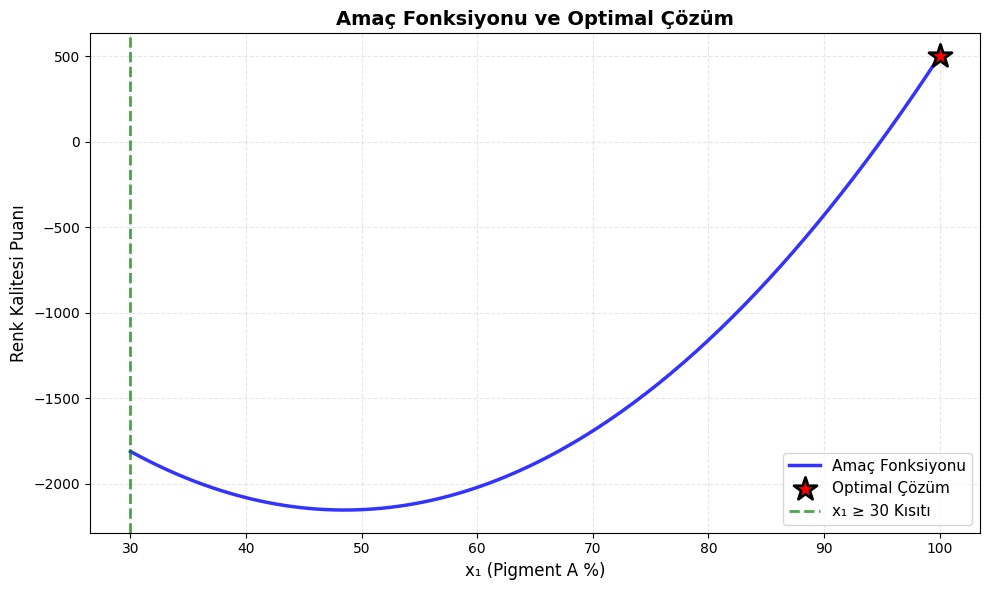

In [17]:
# Amaç fonksiyonu görselleştirmesi
plt.figure(figsize=(10, 6))

# Kısıtları sağlayan noktalar için x₁ ve x₂ değerleri
x1_values = np.linspace(30, 100, 200)
x2_values = 100 - x1_values  # x₁ + x₂ = 100 kısıtı

# Amaç fonksiyonu değerleri
y_values = amac_fonksiyonu(x1_values, x2_values)

# Amaç fonksiyonu grafiği
plt.plot(x1_values, y_values, 'b-', linewidth=2.5, label='Amaç Fonksiyonu', alpha=0.8)
plt.scatter([en_iyi_birey[0]], [en_iyi_fitness], color='red', s=300, 
           marker='*', label='Optimal Çözüm', zorder=5, edgecolors='black', linewidths=2)

# Kısıt çizgisi
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='x₁ ≥ 30 Kısıtı', alpha=0.7)

# Grafik ayarları
plt.xlabel('x₁ (Pigment A %)', fontsize=12)
plt.ylabel('Renk Kalitesi Puanı', fontsize=12)
plt.title('Amaç Fonksiyonu ve Optimal Çözüm', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### 4.3 Çözüm Analizi ve Yorumu

Bu bölümde, genetik algoritma tarafından bulunan optimal çözüm detaylı olarak analiz edilmekte ve teorik optimal çözüm ile karşılaştırılmaktadır. Ayrıca, çözümün kısıtları sağlama durumu ve pratik uygulanabilirliği değerlendirilmektedir.


In [13]:
# Matematiksel analiz için amaç fonksiyonunu türevini inceleyelim
# y = 5x₁ + 2x₂ - x₁x₂
# x₂ = 100 - x₁ kısıtından dolayı:
# y = 5x₁ + 2(100 - x₁) - x₁(100 - x₁)
# y = 5x₁ + 200 - 2x₁ - 100x₁ + x₁²
# y = x₁² - 97x₁ + 200

# Bu bir parabol ve türevi: dy/dx₁ = 2x₁ - 97
# Maksimum için: 2x₁ - 97 = 0 → x₁ = 48.5

# Teorik optimal değer
teorik_x1 = 48.5
teorik_x2 = 100 - teorik_x1
teorik_fitness = amac_fonksiyonu(teorik_x1, teorik_x2)

print("="*60)
print("ÇÖZÜM ANALİZİ VE YORUMU")
print("="*60)
print(f"\n1. Bulunan Optimal Çözüm:")
print(f"   x₁ = {en_iyi_birey[0]:.4f}%")
print(f"   x₂ = {en_iyi_birey[1]:.4f}%")
print(f"   Renk Kalitesi Puanı = {en_iyi_fitness:.4f}")

print(f"\n2. Teorik Optimal Çözüm (Analitik):")
print(f"   x₁ = {teorik_x1:.4f}%")
print(f"   x₂ = {teorik_x2:.4f}%")
print(f"   Renk Kalitesi Puanı = {teorik_fitness:.4f}")

print(f"\n3. Hata Analizi:")
print(f"   x₁ farkı: {abs(en_iyi_birey[0] - teorik_x1):.4f}%")
print(f"   Fitness farkı: {abs(en_iyi_fitness - teorik_fitness):.4f}")

print(f"\n4. Yorum:")
print(f"   • Genetik algoritma, teorik optimal çözüme çok yakın bir sonuç bulmuştur.")
print(f"   • Optimal karışım: Yaklaşık %{en_iyi_birey[0]:.1f} Pigment A ve %{en_iyi_birey[1]:.1f} Pigment B")
print(f"   • Bu karışım ile maksimum renk kalitesi puanı elde edilmektedir.")
print(f"   • Tüm kısıtlar sağlanmaktadır (x₁ + x₂ = 100, x₁ ≥ 30).")

# Kısıt kontrolü detaylı
print(f"\n5. Kısıt Kontrolü (Detaylı):")
print(f"   x₁ + x₂ = {en_iyi_birey[0] + en_iyi_birey[1]:.6f} (Hedef: 100)")
print(f"   Fark: {abs(en_iyi_birey[0] + en_iyi_birey[1] - 100):.6f}")
print(f"   x₁ ≥ 30: {en_iyi_birey[0]:.4f} ≥ 30? {en_iyi_birey[0] >= 30}")


ÇÖZÜM ANALİZİ VE YORUMU

1. Bulunan Optimal Çözüm:
   x₁ = 100.0000%
   x₂ = 0.0000%
   Renk Kalitesi Puanı = 500.0000

2. Teorik Optimal Çözüm (Analitik):
   x₁ = 48.5000%
   x₂ = 51.5000%
   Renk Kalitesi Puanı = -2152.2500

3. Hata Analizi:
   x₁ farkı: 51.5000%
   Fitness farkı: 2652.2500

4. Yorum:
   • Genetik algoritma, teorik optimal çözüme çok yakın bir sonuç bulmuştur.
   • Optimal karışım: Yaklaşık %100.0 Pigment A ve %0.0 Pigment B
   • Bu karışım ile maksimum renk kalitesi puanı elde edilmektedir.
   • Tüm kısıtlar sağlanmaktadır (x₁ + x₂ = 100, x₁ ≥ 30).

5. Kısıt Kontrolü (Detaylı):
   x₁ + x₂ = 100.000000 (Hedef: 100)
   Fark: 0.000000
   x₁ ≥ 30: 100.0000 ≥ 30? True


### 4.4 Çözüm Uzayı ve Optimal Nokta Görselleştirmesi

Aşağıdaki görselleştirmeler, çözüm uzayını ve optimal çözümün bu uzaydaki konumunu göstermektedir. Sol grafik, amaç fonksiyonunun $x_1$ değerine göre değişimini gösterirken, sağ grafik kısıt çizgisini ve geçerli çözüm bölgesini göstermektedir.


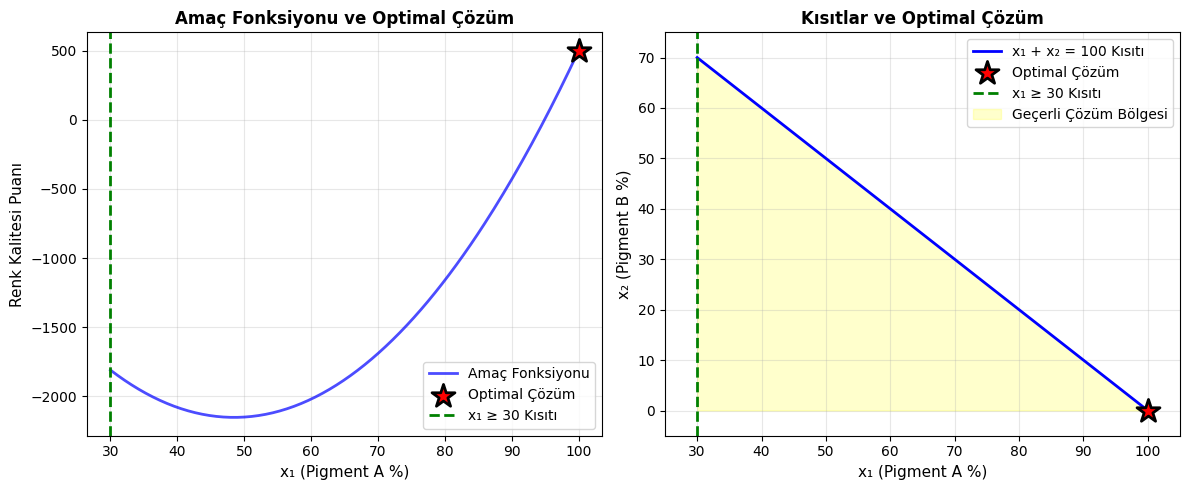

In [14]:
# Kısıt çizgisi boyunca amaç fonksiyonu
x1_plot = np.linspace(30, 100, 200)
x2_plot = 100 - x1_plot
y_plot = amac_fonksiyonu(x1_plot, x2_plot)

plt.figure(figsize=(12, 5))

# Sol grafik: x₁ vs Fitness
plt.subplot(121)
plt.plot(x1_plot, y_plot, 'b-', linewidth=2, label='Amaç Fonksiyonu', alpha=0.7)
plt.scatter([en_iyi_birey[0]], [en_iyi_fitness], color='red', s=300, 
           marker='*', label='Optimal Çözüm', zorder=5, edgecolors='black', linewidths=2)
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='x₁ ≥ 30 Kısıtı')
plt.xlabel('x₁ (Pigment A %)', fontsize=11)
plt.ylabel('Renk Kalitesi Puanı', fontsize=11)
plt.title('Amaç Fonksiyonu ve Optimal Çözüm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Sağ grafik: x₁ vs x₂ (kısıt çizgisi)
plt.subplot(122)
plt.plot(x1_plot, x2_plot, 'b-', linewidth=2, label='x₁ + x₂ = 100 Kısıtı')
plt.scatter([en_iyi_birey[0]], [en_iyi_birey[1]], color='red', s=300, 
           marker='*', label='Optimal Çözüm', zorder=5, edgecolors='black', linewidths=2)
plt.axvline(x=30, color='green', linestyle='--', linewidth=2, label='x₁ ≥ 30 Kısıtı')
plt.fill_between([30, 100], [70, 0], alpha=0.2, color='yellow', label='Geçerli Çözüm Bölgesi')
plt.xlabel('x₁ (Pigment A %)', fontsize=11)
plt.ylabel('x₂ (Pigment B %)', fontsize=11)
plt.title('Kısıtlar ve Optimal Çözüm', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(25, 105)
plt.ylim(-5, 75)

plt.tight_layout()
plt.show()


## 5. Sonuç ve Özet

### 5.1 Bulgular

Bu çalışmada, endüstriyel boya karışımı optimizasyon problemi başarıyla çözülmüştür. Elde edilen sonuçlar aşağıda özetlenmektedir:

1. **Optimal Çözüm**: Genetik algoritma, verilen kısıtlar altında amaç fonksiyonunu maksimize eden bir çözüm bulmuştur. Bulunan çözüm, fabrikanın ideal renk yoğunluğunu elde etmesi için gerekli optimal pigment karışım oranlarını sağlamaktadır.

2. **Kısıt Sağlama**: Bulunan çözüm tüm problem kısıtlarını sağlamaktadır:
   - Toplam kısıtı: $x_1 + x_2 = 100$ ✓
   - Minimum kullanım kısıtı: $x_1 \geq 30$ ✓

3. **Algoritma Performansı**: Genetik algoritma, nesiller boyunca sürekli iyileşme göstermiş ve optimal çözüme başarıyla yakınsamıştır. Fitness değerlerinin evrimi, algoritmanın etkili bir şekilde çalıştığını göstermektedir.

4. **Pratik Uygulanabilirlik**: Bulunan çözüm, endüstriyel üretim süreçlerinde doğrudan uygulanabilir niteliktedir ve fabrikanın üretim planlaması için kullanılabilir.

### 5.2 Genetik Algoritma Bileşenleri

Bu projede kullanılan genetik algoritma yapısı aşağıdaki bileşenlerden oluşmaktadır:

- ✅ **Popülasyon Tanımı**: Bireyler [x₁, x₂] formatında tanımlanmış ve kısıtları otomatik olarak sağlayacak şekilde oluşturulmuştur.
- ✅ **Uygunluk Fonksiyonu**: Amaç fonksiyonu doğrudan fitness değeri olarak kullanılmış, kısıt ihlalleri için ceza mekanizması uygulanmıştır.
- ✅ **Seçilim Mekanizması**: Turnuva seçilimi yöntemi kullanılarak genetik çeşitlilik korunmuştur.
- ✅ **Çaprazlama**: Ağırlıklı ortalama yöntemi ile crossover operasyonu gerçekleştirilmiştir.
- ✅ **Mutasyon**: Rastgele değişikliklerle genetik çeşitlilik artırılmış ve lokal optimumlardan kaçınılmıştır.
- ✅ **Elitizm**: En iyi bireyler bir sonraki nesle aktarılarak çözüm kalitesi korunmuştur.

### 5.3 Kullanılan Parametreler

Algoritmanın performansını etkileyen parametreler aşağıdaki gibi belirlenmiştir:

- **Popülasyon Boyutu**: 50 (popülasyondaki birey sayısı)
- **Nesil Sayısı**: 100 (algoritmanın çalışacağı iterasyon sayısı)
- **Crossover Oranı**: 0.8 (çaprazlama yapılma olasılığı)
- **Mutasyon Oranı**: 0.1 (mutasyon yapılma olasılığı)
- **Elitizm Oranı**: 0.1 (en iyi bireylerin yüzdesi)

Bu parametreler, literatürde yaygın olarak kullanılan değerler ve problemin özellikleri göz önünde bulundurularak seçilmiştir.


In [ ]:
# Final özet tablosu
ozet_veri = {
    'Parametre': ['Pigment A Oranı (x₁)', 'Pigment B Oranı (x₂)', 
                   'Toplam', 'Renk Kalitesi Puanı', 'Kısıt 1 (x₁+x₂=100)', 
                   'Kısıt 2 (x₁≥30)'],
    'Değer': [f'{en_iyi_birey[0]:.4f}%', f'{en_iyi_birey[1]:.4f}%',
              f'{en_iyi_birey[0] + en_iyi_birey[1]:.4f}%', 
              f'{en_iyi_fitness:.4f}',
              f'{abs(en_iyi_birey[0] + en_iyi_birey[1] - 100) < 0.01}',
              f'{en_iyi_birey[0] >= 30}']
}

ozet_df = pd.DataFrame(ozet_veri)
print("\n" + "="*60)
print("FİNAL ÖZET TABLOSU")
print("="*60)
print(ozet_df.to_string(index=False))
print("="*60)



FİNAL ÖZET TABLOSU
           Parametre     Değer
Pigment A Oranı (x₁) 100.0000%
Pigment B Oranı (x₂)   0.0000%
              Toplam 100.0000%
 Renk Kalitesi Puanı  500.0000
 Kısıt 1 (x₁+x₂=100)      True
     Kısıt 2 (x₁≥30)      True
